# Generate Lightcurve for Matt (TIC279255411: Teff:6691 K)

The only tess lc dataproduct for this object is from the QLP data pipeline which turns FFIs into lightcurves. However, I was only able to access the normalized SAP_flux and SAP_background, so for proper energy calculations, this won't work.
Since TESS reduce also uses TESSCut (FFI cutouts) it also has the same cadence, I can generate the lightcurve that way.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import pandas as pd

from astropy.time import Time
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits

import lightkurve as lk
import tessreduce as tr

import pickle

Load Matt's identifying data

In [5]:
coinciding_flares_df = pd.read_pickle('..\..\data\spt_tess_candidates_tandoi24.pkl')
coinciding_flares_df

,index,spt_id,mjd,ts,ra,dec,95_flux,95_flux_err,150_flux,150_flux_err,...,phot_bp_mean_mag,phot_rp_mean_mag,parallax,parallax_err,binary,2rxs_id,2rxs_ref,2rxs_flux,sectors,TIC
0,42,SPT-SV J232857.8-680230,59067.63,69.829680,352.241137,-68.041907,33.132387,6.050987,44.396645,6.479653,...,13.298294,10.835975,21.814973,0.016096,True,2RXS J232857.7-680225,Freund,0.0,[28],TIC229807000
1,43,SPT-SV J220610.2-460354,59068.28,65.720511,331.542835,-46.065046,47.818806,8.045753,50.842904,8.377214,...,11.394999,10.820612,2.686802,0.032307,False,NaN,NaN,NaN,[28],TIC279255411
2,46,SPT-SV J025532.4-570257,59110.27,1233.665708,43.885140,-57.049441,162.083004,7.148120,206.963060,7.665012,...,16.325182,13.060138,21.889704,0.021013,False,NaN,NaN,NaN,[29],TIC207138379
3,49,SPT-SV J014432.2-460435,59131.78,48.975169,26.134435,-46.076393,45.598152,8.294850,36.632626,8.695313,...,18.198709,14.208293,25.949235,0.045132,False,NaN,NaN,NaN,[30],TIC401838575


In [6]:
Matt = coinciding_flares_df.iloc[1]
Matt

index                                              43
spt_id                        SPT-SV J220610.2-460354
mjd                                          59068.28
ts                                          65.720511
ra                                         331.542835
dec                                        -46.065046
95_flux                                     47.818806
95_flux_err                                  8.045753
150_flux                                    50.842904
150_flux_err                                 8.377214
220_flux                                    35.099683
220_flux_err                                31.004937
spectral_index_95_150                        0.134254
spectral_index_95_150_err                    0.515578
spectral_index_150_220                      -0.967509
spectral_index_150_220_err                   2.346196
dr3_source_id                     6567445491726233216
p-value                                      0.001032
source_ra                   

getting TPF from TESScut
Start
	 - 0.0
made reference
	 - 0.23742365837097168
made source mask
	 - 12.222242593765259
calculating background
	 - 12.222242593765259
background subtracted
	 - 125.3660409450531
aligning images
	 - 125.39775252342224


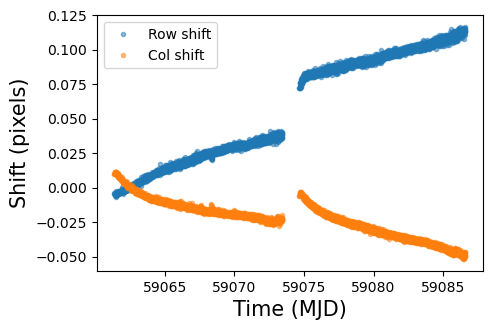

images shifted
	 - 322.22843766212463
field calibration
	 - 322.22843766212463
target is below -30 dec, calibrating to SkyMapper photometry.


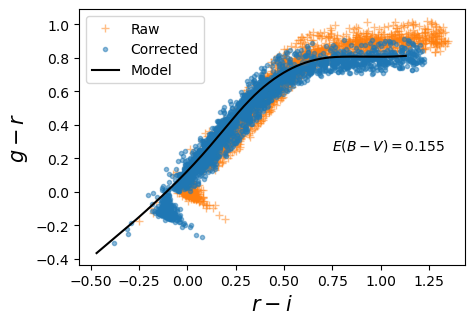

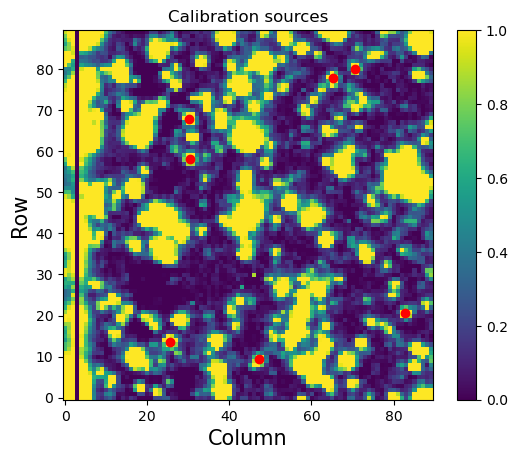

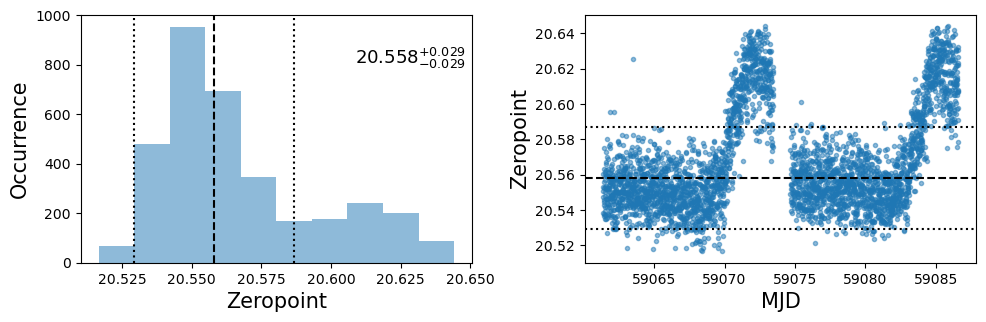

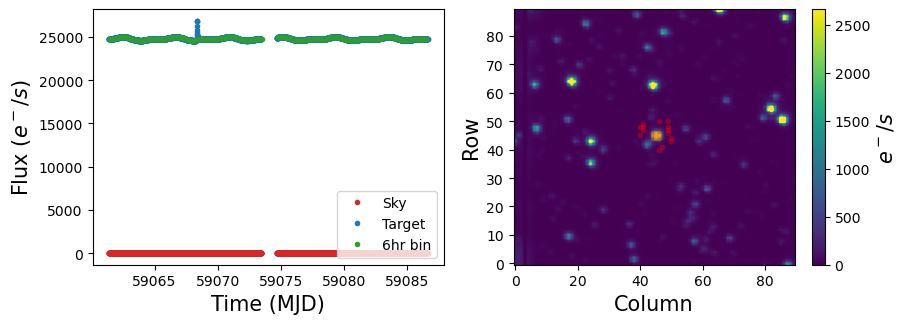

End
	 - 359.8334746360779


In [10]:
ra = Matt['ra']
if ra < 0: ra +=360
dec = Matt['dec']
sectors = Matt['sectors']
TR = tr.tessreduce(ra= ra, dec= dec, sector= sectors[0], plot= True, diagnostic_plot= True, diff= False)

<Axes: xlabel='Time', ylabel='Flux [$\\mathrm{mJy}$]'>

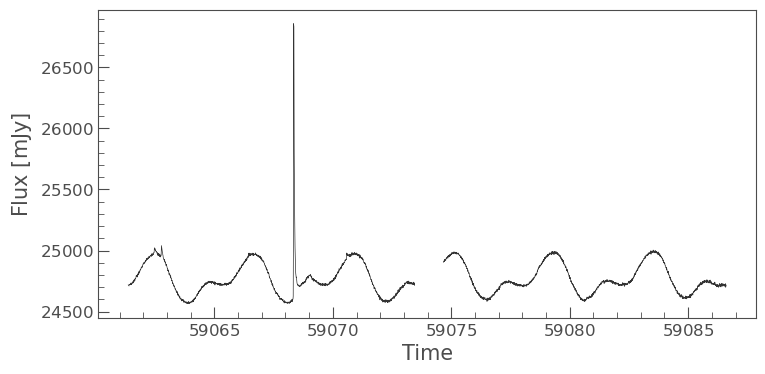

In [11]:
lc = TR.to_lightkurve(flux_unit= 'mjy')
lc.flux = lc.flux.to(u.mJy)
lc.flux_err = lc.flux_err.to(u.mJy)
lc.plot()

In [12]:
lc.to_fits('..\..\data\TESS\Matt_TESS_lc_diff_FALSE.fits', overwrite= True)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x00000182C3675F10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x00000182A8082490>]